# Demanda historica

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [58]:
#demanda historica 18 MB
df6 = pd.read_csv('C:\\Users\\User\\Downloads\\grupoISPC\\demanda-histrica.csv')
df6.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122263 entries, 0 to 122262
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   anio                122263 non-null  int64  
 1   mes                 122263 non-null  int64  
 2   agente_nemo         122263 non-null  object 
 3   agente_descripcion  122263 non-null  object 
 4   tipo_agente         122263 non-null  object 
 5   region              122263 non-null  object 
 6   provincia           122263 non-null  object 
 7   categoria_area      122263 non-null  object 
 8   categoria_demanda   122263 non-null  object 
 9   tarifa              122263 non-null  object 
 10  categoria_tarifa    122263 non-null  object 
 11  demanda_MWh         122263 non-null  float64
 12  indice_tiempo       122263 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 12.1+ MB


In [59]:
df6.shape
print(df6.columns)


Index(['anio', 'mes', 'agente_nemo', 'agente_descripcion', 'tipo_agente',
       'region', 'provincia', 'categoria_area', 'categoria_demanda', 'tarifa',
       'categoria_tarifa', 'demanda_MWh', 'indice_tiempo'],
      dtype='object')


In [61]:
#Consulta duplicados
df6.duplicated().value_counts()

False    122263
Name: count, dtype: int64

In [ ]:
#se convierne en TWh

df6['demanda_TWh'] = df6['demanda_MWh'] / 1000000
df6.drop('demanda_MWh', axis=1, inplace=True)
print(df6.head(5))

###  Año y Energia TWh

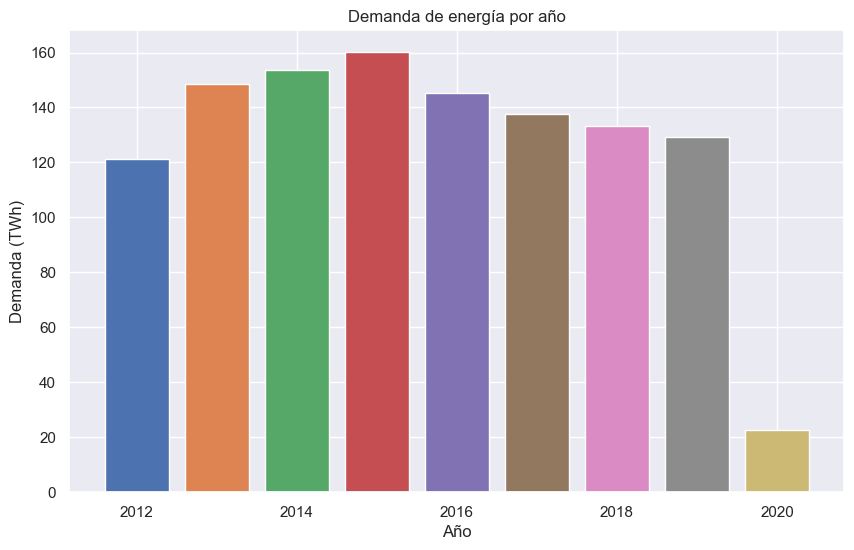

In [68]:

grupoAnioTWh = df6.groupby('anio')['demanda_TWh'].sum().reset_index()

plt.figure(figsize=(10, 6))
palette = sns.color_palette() 
plt.bar(grupoAnioTWh['anio'], grupoAnioTWh['demanda_TWh'], color=palette)
plt.xlabel('Año')
plt.ylabel('Demanda (TWh)')
plt.title('Demanda de energía por año')
plt.grid(True)
plt.show()

In [74]:

#Tipo de regiones
region = df6.groupby("region").size().reset_index(name="totales")
print(region)


         region  totales
0  BUENOS AIRES    45915
1        CENTRO     4345
2       COMAHUE     7414
3          CUYO     7891
4   GRAN BS.AS.    22265
5       LITORAL     9622
6       NORESTE     5555
7      NOROESTE     9101
8    PATAGONICA    10155


In [79]:

map_region = {
        
  'BUENOS AIRES': 'BsAs',
  'CENTRO':'Centro',
  'COMAHUE':'COMAHUE',
  'CUYO': 'Cuyo',
  'GRAN BS.AS.': 'GBA',
  'LITORAL': 'Litoral',
  'NORESTE': 'NE',
  'NOROESTE': 'NO',  
  'PATAGONICA': 'PATAGONIA',
}

df6['map_region'] = df6['region'].map(map_region)


print(df6.head())


   anio  mes agente_nemo            agente_descripcion tipo_agente   
0  2012    1    AARGTAOY   AEROP ARG 2000 - Aeroparque          GU  \
1  2012    1    ACARQQ3Y      ASOC.COOP.ARG. - Quequén          GU   
2  2012    1    ACARSLSY  ASOC.COOP.ARG. - San Lorenzo          GU   
3  2012    1    ACINROSY    ACINDAR ROSARIO EX-NAVARRO          GU   
4  2012    1    ACINTBOY          ACINDAR PTA. TABLADA          GU   

         region     provincia    categoria_area categoria_demanda   
0   GRAN BS.AS.  BUENOS AIRES  Gran Usuario MEM      Gran Usuario  \
1  BUENOS AIRES  BUENOS AIRES  Gran Usuario MEM      Gran Usuario   
2       LITORAL      SANTA FE  Gran Usuario MEM      Gran Usuario   
3       LITORAL      SANTA FE  Gran Usuario MEM      Gran Usuario   
4   GRAN BS.AS.  BUENOS AIRES  Gran Usuario MEM      Gran Usuario   

                  tarifa             categoria_tarifa indice_tiempo   
0  GUMAS/AUTOGENERADORES  Industrial/Comercial Grande       2012-01  \
1  GUMAS/AUTOGENERADOR

### Demanda y Region

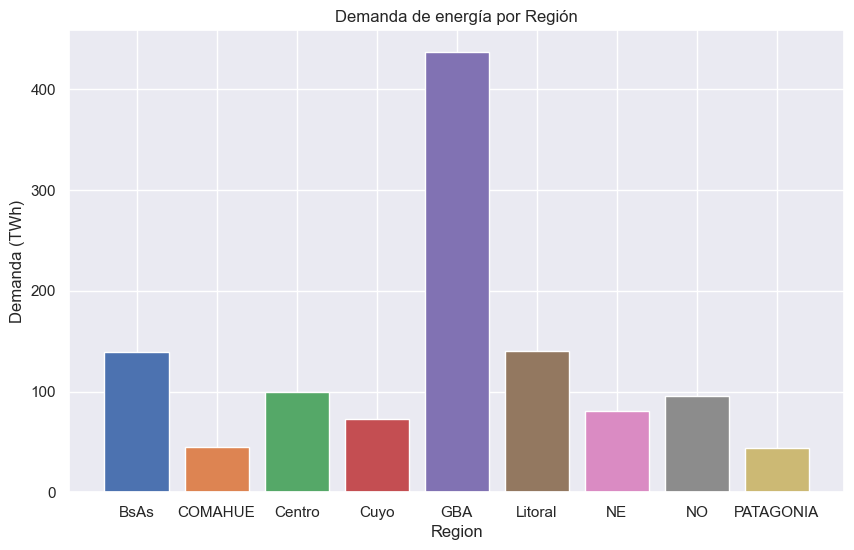

In [81]:
grupoAnioTWh = df6.groupby('map_region')['demanda_TWh'].sum().reset_index()

plt.figure(figsize=(10, 6))
palette = sns.color_palette() 
plt.bar(grupoAnioTWh['map_region'], grupoAnioTWh['demanda_TWh'], color=palette)
plt.xlabel('Region')
plt.ylabel('Demanda (TWh)')
plt.title('Demanda de energía por Región')
plt.grid(True)
plt.show()